# Lab 4

## 3. Tasks and Questions

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import keras as k
import sklearn as sk
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [122]:
bd_train = np.reshape(np.loadtxt('../../bindigit_trn.csv', delimiter=',', dtype = 'float32'), [8000, 784])
bd_test = np.reshape(np.loadtxt('../../bindigit_tst.csv', delimiter=',', dtype = 'float32'), [2000, 784])
td_train = np.reshape(np.loadtxt('../../targetdigit_trn.csv', delimiter=',', dtype = 'float32'), [8000])
td_test = np.reshape(np.loadtxt('../../targetdigit_tst.csv', delimiter=',', dtype = 'float32'), [2000])

### 3.1 Autoencoder for binary-type MNIST images

In [144]:
def create_model(n_hidden, reg):
    model = k.models.Sequential()
    model.add(k.layers.Dense(n_hidden, input_dim = 784, kernel_initializer='RandomNormal', activation='relu', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
    model.add(k.layers.Dense(784, kernel_initializer='RandomNormal', activation='sigmoid', use_bias = True,
                             bias_initializer = 'Zeros', kernel_regularizer=k.regularizers.l2(reg)))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return(model)

callback = k.callbacks.EarlyStopping(monitor='loss', min_delta=0, )
seed = 7
np.random.seed(seed)
model = KerasRegressor(build_fn=create_model)

In [183]:
epochs = [20, 50 , 100]
n_hiddens = [50, 100, 300]
#n_hidden = [50]
#regs = [0.001]
regs = [0.00001, 0.001, 0.01]
params = dict(epochs = epochs, n_hidden = n_hiddens, reg = regs, batch_size = [256])

In [184]:
grid = GridSearchCV(estimator=model, param_grid=params, n_jobs=1, verbose = 1, )

In [185]:
# Sampling to accelerate the grid Search

n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=seed)
splits = skf.split(bd_train, td_train)
for x,y in splits:
    bd_train_sample = bd_train[y]
    td_train_sample = td_train[y]
    break

In [186]:
grid_result2 = grid.fit(bd_train_sample, bd_train_sample, verbose = 0)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
536/536 [==============================] - 0s 50us/step


536/536 [==============================] - 0s 91us/step


[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  6.8min finished


In [163]:
save = grid_result

In [194]:
gr = grid_result2
gr.best_score_

-0.03906641984973126

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


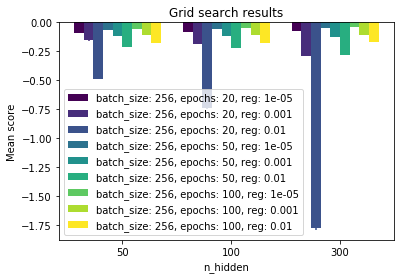

In [195]:
from sklearn_evaluation import plot
plot.grid_search(gr.grid_scores_, change = 'n_hidden', kind = 'bar')

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


(-0.5, 0)

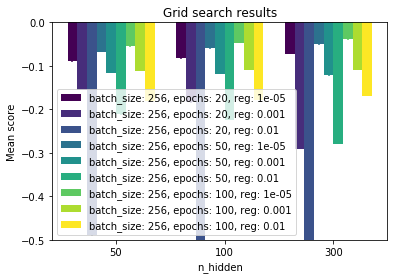

In [196]:
from sklearn_evaluation import plot
ax = plot.grid_search(gr.grid_scores_, change = 'n_hidden', kind = 'bar')
ax.set_ylim([-0.5,0])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


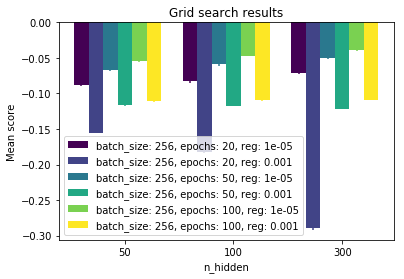

In [200]:
from sklearn_evaluation import plot
ax = plot.grid_search(gr.grid_scores_, change = 'n_hidden', kind = 'bar', subset = {'reg' : [0.00001, 0.001]})

C:\Program Files\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


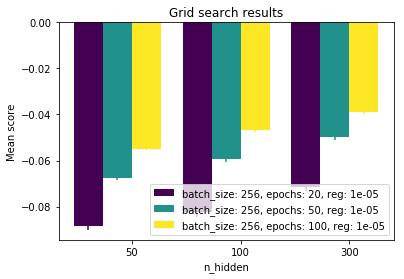

In [201]:
from sklearn_evaluation import plot
ax = plot.grid_search(gr.grid_scores_, change = 'n_hidden', kind = 'bar', subset = {'reg' : [0.00001]})

Modele chosen: batch_size = 256, epochs = 100, reg = 1e-5, n_hidden = 300

In [214]:
model = create_model(300, 1e-5)

In [215]:
hist = model.fit(batch_size=256, epochs=100, x=bd_train, y= bd_train)

Epoch 1/100
8000/8000 [==============================] - 2s 304us/step - loss: 0.1303
Epoch 2/100
8000/8000 [==============================] - 2s 259us/step - loss: 0.0747
Epoch 3/100
8000/8000 [==============================] - 2s 257us/step - loss: 0.0596
Epoch 4/100
8000/8000 [==============================] - 2s 280us/step - loss: 0.0506
Epoch 5/100
8000/8000 [==============================] - 2s 268us/step - loss: 0.0443
Epoch 6/100
8000/8000 [==============================] - 2s 257us/step - loss: 0.0399
Epoch 7/100
8000/8000 [==============================] - 2s 277us/step - loss: 0.0367
Epoch 8/100
8000/8000 [==============================] - 2s 254us/step - loss: 0.0343
Epoch 9/100
8000/8000 [==============================] - 2s 273us/step - loss: 0.0325
Epoch 10/100
8000/8000 [==============================] - 2s 307us/step - loss: 0.0310
Epoch 11/100
8000/8000 [==============================] - ETA: 0s - loss: 0.029 - 2s 258us/step - loss: 0.0298
Epoch 12/100
8000/8000 [====

8000/8000 [==============================] - 3s 339us/step - loss: 0.0213
Epoch 95/100
8000/8000 [==============================] - 3s 318us/step - loss: 0.0213
Epoch 96/100
8000/8000 [==============================] - 2s 312us/step - loss: 0.0213
Epoch 97/100
8000/8000 [==============================] - 3s 316us/step - loss: 0.0213
Epoch 98/100
8000/8000 [==============================] - 2s 303us/step - loss: 0.0213
Epoch 99/100
8000/8000 [==============================] - 3s 314us/step - loss: 0.0213
Epoch 100/100
8000/8000 [==============================] - 3s 320us/step - loss: 0.0212


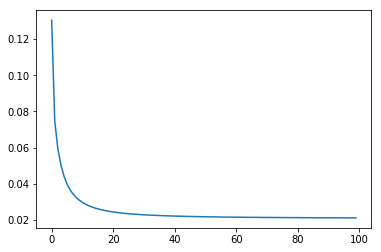

In [216]:
loss_hist = hist.history['loss']
plt.plot(loss_hist)

Text(0.5,1,'Output from our model, with rounding function')

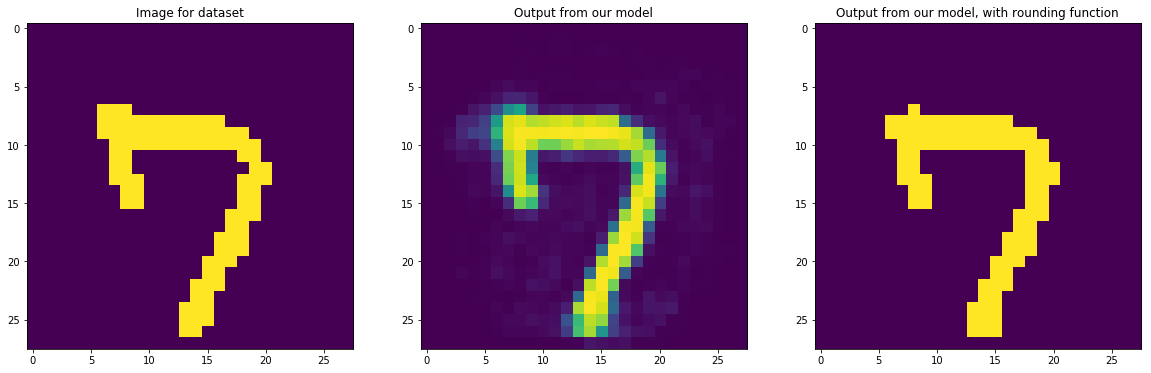

In [261]:
fig, axs = plt.subplots(1,3, figsize = [20,6])

random_img = bd_train[25].reshape([28,28])
axs[0].imshow(random_img)
axs[0].set_title('Image for dataset')
new_img = model.predict(x=np.array([bd_train[25]]))[0].reshape([28,28])
axs[1].imshow(new_img)
axs[1].set_title('Output from our model')
new_img_round = np.round(model.predict(x=np.array([bd_train[25]]))[0].reshape([28,28]))
axs[2].imshow(new_img_round)
axs[2].set_title('Output from our model, with rounding function')

In [263]:
model_50 = create_model(50, 1e-5)
hist = model_50.fit(batch_size=256, epochs=50, x=bd_train, y= bd_train)

Epoch 1/50
8000/8000 [==============================] - 1s 99us/step - loss: 0.1711
Epoch 2/50
8000/8000 [==============================] - 1s 95us/step - loss: 0.0890
Epoch 3/50
8000/8000 [==============================] - 1s 147us/step - loss: 0.0780
Epoch 4/50
8000/8000 [==============================] - 1s 125us/step - loss: 0.0690
Epoch 5/50
8000/8000 [==============================] - 1s 89us/step - loss: 0.0627
Epoch 6/50
8000/8000 [==============================] - 1s 99us/step - loss: 0.0581
Epoch 7/50
8000/8000 [==============================] - 1s 107us/step - loss: 0.0546
Epoch 8/50
8000/8000 [==============================] - 1s 96us/step - loss: 0.0517
Epoch 9/50
8000/8000 [==============================] - 1s 98us/step - loss: 0.0495
Epoch 10/50
8000/8000 [==============================] - 1s 97us/step - loss: 0.0476
Epoch 11/50
8000/8000 [==============================] - 1s 91us/step - loss: 0.0459
Epoch 12/50
8000/8000 [==============================] - 1s 98us/step -

In [283]:
weights = model_50.get_weights()[0].T

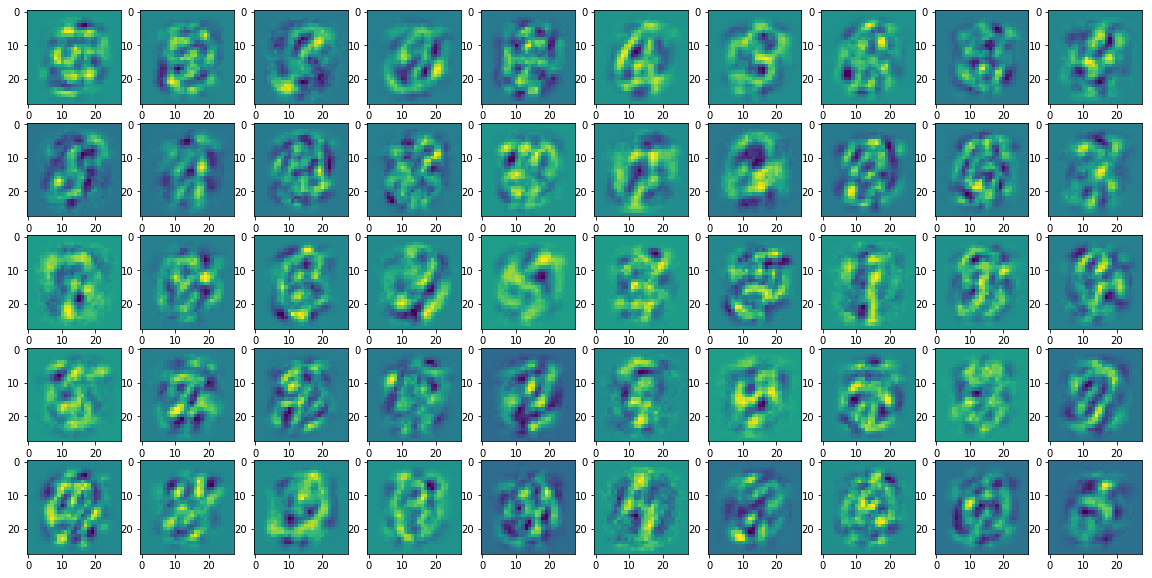

In [285]:
fig, ax = plt.subplots(5, 10, figsize = [20, 10])
for i in range(5):
    for j in range(10):
        ax[i][j].imshow(weights[i*10+j].reshape([28,28]))